In [3]:
import requests ## Importa la librería 'requests', que permite hacer solicitudes HTTP
                              # (GET, POST, etc.) a páginas web para obtener su contenido en HTML o JSON
from bs4 import BeautifulSoup ## Importa la clase BeautifulSoup de la librería 'bs4'
                              # Sirve para analizar (parsear) el HTML descargado y extraer
                              # información de etiquetas específicas

In [2]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html" # Lo hacemos con esto porque es texto plano.
# En la variable url cargamos como string el texto que quiero traer.
# En este caso, la URL apunta a un libro del Proyecto Gutenberg.
contenido = requests.get(url).text # El requests con el get lo paso por url y lo convierte a texto.
# Texto plano que en realidad es HTML, con todas sus etiquetas (<html>, <p>, <h1>, etc.).
# Lo almaceno en una variable llamada contenido.
# .text sirve para transformar la respuesta del servidor en un string legible de Python.

In [4]:
soup = BeautifulSoup(contenido, "html.parser") ## Acá estamos creando el objeto BeautifulSoup a partir del contenido que descargamos antes.
# - 'contenido' es el HTML en texto plano que trajimos con requests.
# - "html.parser" le dice a BeautifulSoup que use el parser de Python para analizar la estructura del HTML.
# El resultado es un objeto 'soup' que entiende el HTML como un árbol:
# podemos recorrerlo, buscar etiquetas (<title>, <p>, <h1>, etc.) y extraer solo lo que nos interesa.

In [6]:
parrafos = soup.find_all("p") ## Usamos el método .find_all("p") P de parrafo de BeautifulSoup.
# - "p" hace referencia a la etiqueta <p> en HTML (que se usa para párrafos de texto).
# - Esto devuelve una lista con TODOS los elementos <p> encontrados en la página.
# Cada elemento de esa lista sigue siendo un objeto BeautifulSoup (incluye las etiquetas).

In [7]:
print(parrafos) #Tenemos mucha informacion que no nos sirve, basura, y ahi viene el trabajo que tenemos que hacer para tener textos que nos sirvan para trabajar

[<p><strong>Title</strong>: La Odisea</p>, <p><strong>Author</strong>: Homer</p>, <p><strong>Illustrator</strong>: John Flaxman</p>, <p style="margin-top:0"> <span style="padding-left: 7.5ex"></span>Walter Paget</p>, <p><strong>Translator</strong>: Luis Segalá y Estalella</p>, <p><strong>Release date</strong>: November 2, 2018 [eBook #58221]</p>, <p><strong>Language</strong>: Spanish</p>, <p><strong>Credits</strong>: Produced by Ramon Pajares Box, Carlos Colon, and the Online<br/>
        Distributed Proofreading Team at http://www.pgdp.net</p>, <p><a class="pginternal" href="#tnote">Nota de transcripción</a></p>, <p><a class="pginternal" href="#Index">Índice de nombres propios</a></p>, <p><a class="pginternal" href="#ToI">Índice de grabados</a></p>, <p><a class="pginternal" href="#ToC">Índice general</a></p>, <p><a class="pginternal" href="#notas">Notas al prólogo</a></p>, <p><span class="pagenum" id="Page_1">[p. 1]</span></p>, <p><span class="pagenum" id="Page_2">[p. 2]</span></p>, <

In [8]:
h1 = soup.find_all("h1") #Le digo que me busque el titulo principal, H1 es titulo

In [9]:
print(h1) #Imaginemos que le damos la página a un lector: va a leerla siguiendo las etiquetas, y si encuentra un h1 le dará más énfasis, ajustando su comportamiento según la estructura.

[<h1 class="g1 ws1">LA ODISEA</h1>]


In [10]:
italicas = soup.find_all("i") ## Busca todas las etiquetas <i> (texto en cursiva/itálica) en la página
# Devuelve una lista con cada fragmento de texto en itálica encontrado

In [11]:
from collections import Counter #Contador de palabras, libreria de python

In [12]:
parrafos = str(soup.find_all("p")) #Aca en parrafo que es donde almacene mis parrafos, y le tengo que decir que todo eso era un obejto de beautiful sopup y lo tengo que volver a convertir ese objeto en cadena de caracteres

In [13]:
print(parrafos.count("Ulises"))

1662


In [14]:
def buscar_palabra(palabra): #  Definimos una función llamada buscar_palabra que recibe un string (palabra a buscar)
  ocurrencias = str(soup).lower().count(palabra.lower()) ## Convertimos todo el objeto soup a string con str(soup) -> contiene el HTML completo
    # .lower() pasa todo a minúsculas -> así no importa si está "Presidente" o "presidente"
    # .count(palabra.lower()) cuenta cuántas veces aparece la palabra dentro del texto
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [15]:
buscar_palabra("Ciclope")
buscar_palabra("Minerva")
buscar_palabra("Alcínoo")
buscar_palabra("CANTO")

Encontraste la palabra 'Ciclope' 82 veces
Encontraste la palabra 'Minerva' 376 veces
Encontraste la palabra 'Alcínoo' 130 veces
Encontraste la palabra 'CANTO' 114 veces


## Algo divertido

In [16]:
import random

In [17]:
# 2. Mostrar un pasaje aleatorio de la Odisea
parrafos = soup.find_all("p") # Busca todos los párrafos <p> del HTML y los guarda en una lista
parrafo_aleatorio = random.choice(parrafos).text.strip() # Selecciona UN párrafo al azar de la lista con random.choice()
# .text -> obtiene solo el texto del párrafo (sin etiquetas <p>)
# .strip() -> elimina espacios en blanco al inicio y al final

In [18]:
print("\nLee un pasaje aleatorio de la Odisea")
print("-------------------------------------------")
print(parrafo_aleatorio)
print("-------------------------------------------")
print(f"Este párrafo tiene {len(parrafo_aleatorio.split())} palabras.")


Lee un pasaje aleatorio de la Odisea
-------------------------------------------
13 »Entonces arribamos á los
confines del Océano, de profunda corriente. Allí están el pueblo
y la ciudad de los Cimerios entre nieblas y nubes, sin que jamás
el Sol resplandeciente los ilumine con sus rayos, ni cuando sube
al cielo estrellado, ni cuando vuelve del cielo á la tierra, pues
una noche perniciosa se extiende sobre los míseros mortales. Á
tal paraje fué nuestro bajel, que sacamos á la playa; y nosotros,
asiendo las ovejas, anduvimos á lo largo de la[p. 147] corriente del Océano hasta llegar al
sitio que nos indicara Circe.
-------------------------------------------
Este párrafo tiene 94 palabras.


## Visualizaciones interesantes


In [19]:
from wordcloud import WordCloud #Imprime nube de palabras para visualizar que es lo que mas se repite en el texto
import numpy as np
from PIL import Image #Necesito imprimir como imagen
import nltk ## Toolkit de NLP (descargas de corpus, tokenización, stemming, etc.)
from nltk.corpus import stopwords # Trae listas de stopwords (palabras vacías) en varios idiomas, ej. español
import re # # Expresiones regulares: limpiar texto, quitar signos, normalizar patrones

In [20]:
import matplotlib.pyplot as plt #Sirve para plotear graficos y lo traigo con el alias PLT

In [21]:
# Descarga las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
# Función para limpiar y tokenizar el texto. Limpiarlo de expresiones regulares, cualquier tipo de signo etiqueta que no se corresponda con la cuestion semantica del idioma

def limpiar_texto(texto):
    # 1. Preparar el texto
    # Convertir todo a minúsculas
    texto_minusculas = texto.lower()

    # 2. Eliminar signos de puntuación
    # [^\w\s] significa: eliminar todo lo que no sea letra, número o espacio
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)

    # 3. Dividir el texto en palabras individuales
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para almacenar palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra y guardar solo las que no son palabras comunes
    for palabra in lista_palabras:
        if palabra not in stop_words:  # stop_words contiene palabras como "el", "la", "y", etc.
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener el texto completo de la página web
texto_completo = soup.get_text()

# Limpiar el texto y obtener lista de palabras importantes
palabras_limpias = limpiar_texto(texto_completo)

# Unir todas las palabras importantes en un solo texto, separadas por espacios
texto_limpio = ' '.join(palabras_limpias) #pegá todas las palabras de la lista, una tras otra, separadas por un espacio, para formar un texto limpio y listo para análisis.

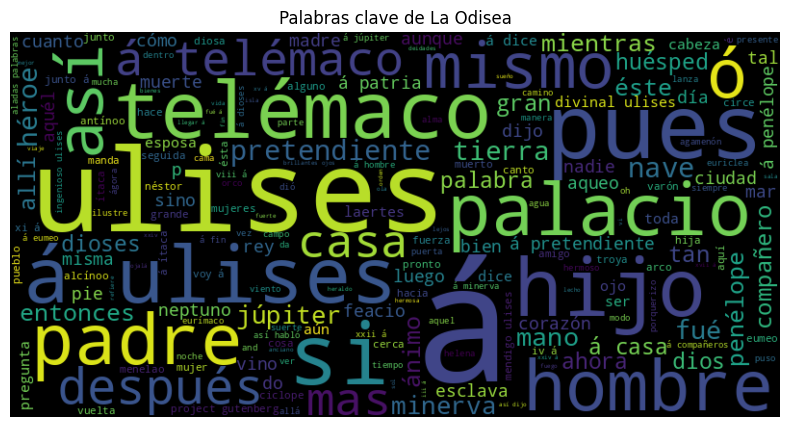

In [23]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()

In [24]:
def limpiar_texto(texto):
    # 1. Definir palabras adicionales a eliminar
    palabras_a_eliminar = {
        'dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á'  # Añade aquí las palabras que quieras eliminar
    }

    # 2. Combinar stopwords con palabras adicionales a eliminar
    todas_palabras_a_eliminar = stop_words.union(palabras_a_eliminar)

    # 3. Preparar el texto
    texto_minusculas = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra
    for palabra in lista_palabras:
        # Guardar solo si no está en la lista de palabras a eliminar
        if palabra not in todas_palabras_a_eliminar:
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener y limpiar el texto
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

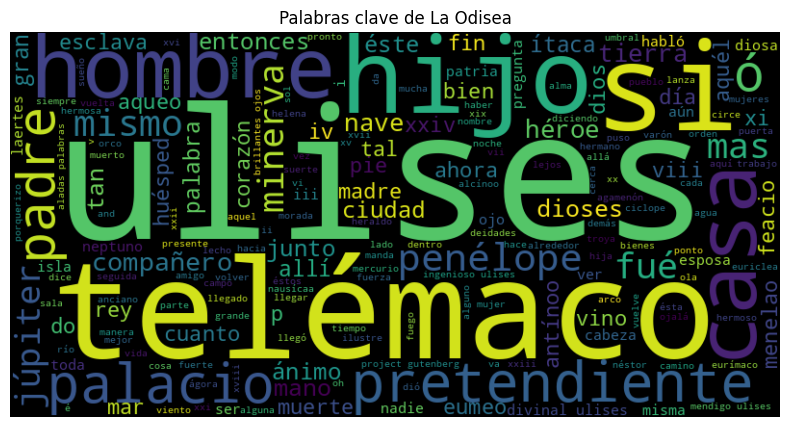

In [25]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()